In [1]:
%matplotlib qt5

In [14]:
import mne
import numpy as np
import matplotlib.pyplot as plt

#for opening UI in seperate window
import PyQt5

In [17]:
raw = mne.io.read_raw_brainvision("data/resting_state/2505_shirokova.vhdr", preload=True)
raw.get_data().shape

Extracting parameters from data/resting_state/2505_shirokova.vhdr...
Setting channel info structure...
Reading 0 ... 604799  =      0.000 ...   604.799 secs...


(61, 604800)

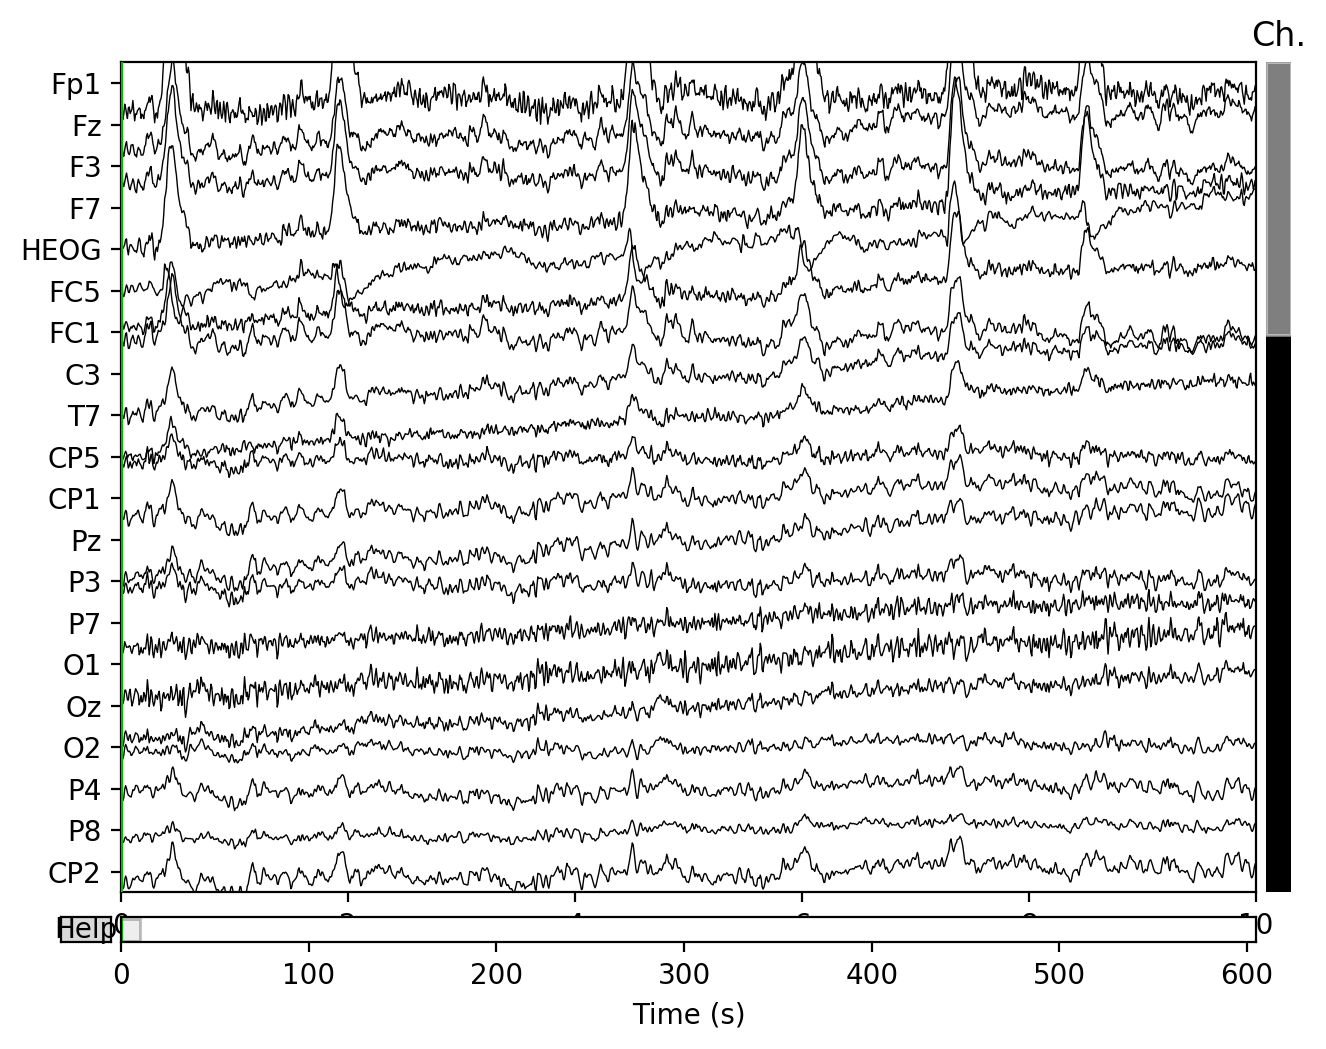

In [18]:
raw.plot(block=True, lowpass=40)

Effective window size : 2.048 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-19-5f454bfb6175>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(tmax=np.inf, average=False)


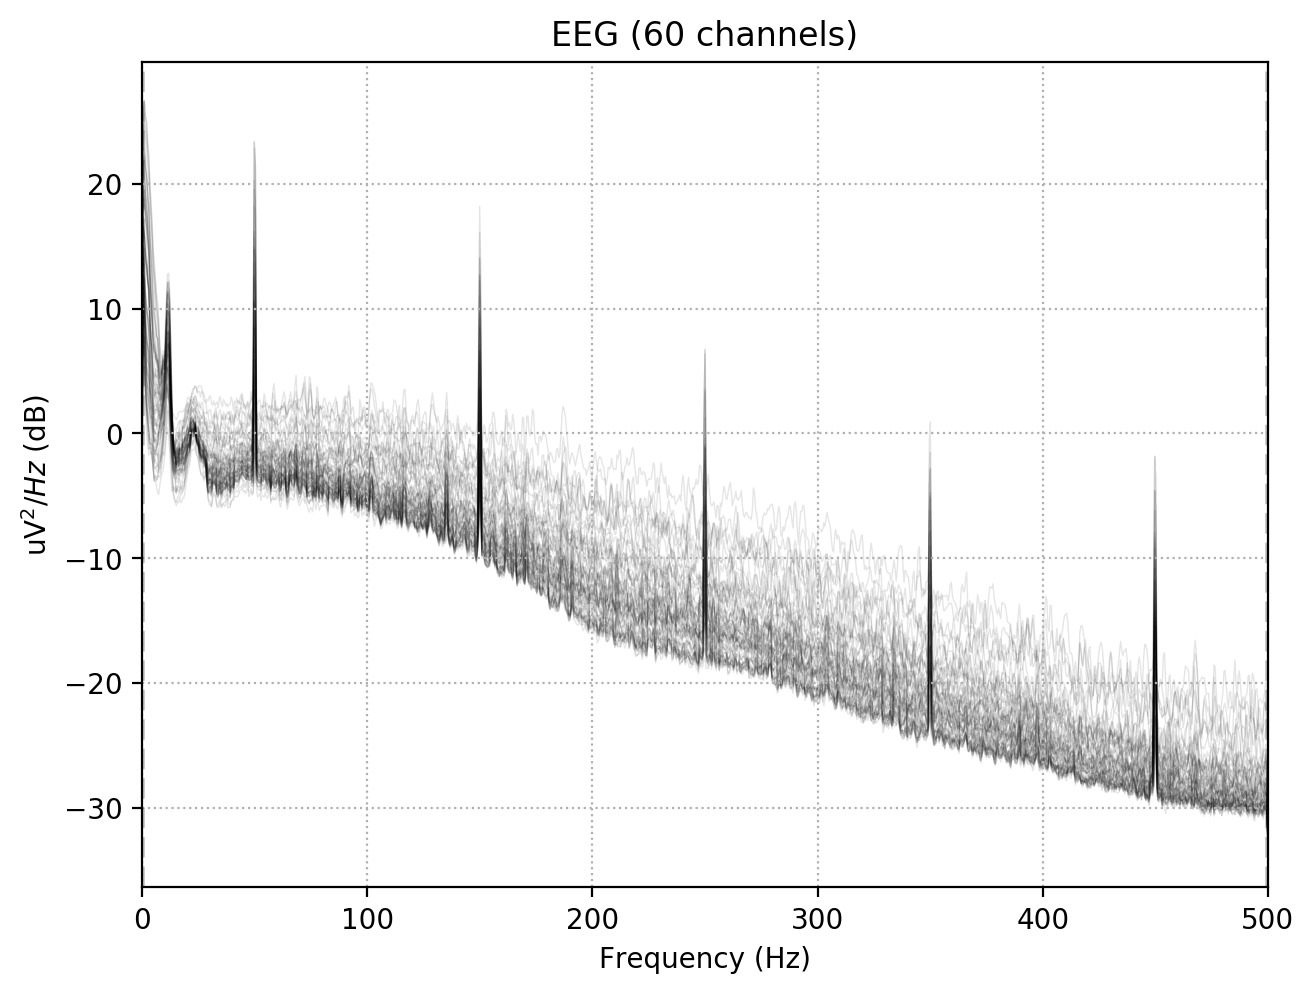

In [19]:
raw.plot_psd(tmax=np.inf, average=False)

In [11]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fz, F3, F7, HEOG, FC5, FC1, C3, T7, ...
    chs : list | 61 items (EEG: 60, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : int | 1511459982
    nchan : int | 61
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : N

In [20]:
raw.get_data().mean(axis = 1)

array([ -6.14824565e-03,   2.46744255e-03,  -2.99457870e-03,
         2.71590604e-03,  -1.15839379e-02,   4.28687109e-03,
        -8.11651041e-03,  -1.88114503e-04,   1.53030578e-03,
        -6.65776028e-03,  -3.23015603e-03,   2.18418338e-04,
        -1.94861922e-03,   4.14534971e-05,   1.28221892e-03,
         1.06663699e-02,   6.69551871e-04,   1.43268861e-03,
        -1.94392039e-03,  -9.46328378e-04,  -3.04642330e-03,
         2.10952897e-03,   1.52050500e-03,  -1.10855629e-02,
        -4.17532534e-03,  -1.53814509e-04,   2.28947225e-03,
        -5.32869009e-04,  -6.85045198e-03,  -5.11460222e-03,
         1.13655802e-04,  -5.15245770e-03,  -3.76228407e-03,
         1.01923427e-03,   1.63223078e-03,   8.16485892e-03,
        -3.66699317e-03,  -2.34692618e-03,   6.73101160e-03,
         3.87731370e-03,   2.51554585e-03,   4.79858821e-04,
        -6.35033575e-03,   3.34339819e-03,  -2.18813311e-03,
        -1.02070566e-03,   3.45815478e-03,  -3.15830465e-03,
         2.13334462e-03,

In [21]:
raw.get_data().mean()

-0.00085083223528683736

In [22]:
raw.get_data().std(axis = 1)

array([  2.93221957e-04,   3.52129714e-04,   2.59374121e-04,
         7.14270197e-04,   7.98438624e-04,   6.76923298e-04,
         1.72153633e-04,   7.55285852e-04,   8.82801964e-04,
         5.90363567e-05,   8.91980689e-05,   1.01476592e-03,
         2.72149162e-04,   3.15117276e-04,   7.63427315e-04,
         8.74282918e-04,   1.55509980e-04,   1.41278276e-04,
         1.39006142e-04,   2.12295244e-04,   3.67797603e-04,
         2.47992481e-04,   3.65914074e-04,   2.59413144e-04,
         3.97612659e-04,   2.65572141e-04,   3.46958781e-04,
         2.60806700e-04,   4.45561389e-04,   2.78511825e-04,
         4.03353470e-04,   1.11315037e-04,   4.09033593e-04,
         8.05164481e-04,   6.17702342e-04,   9.17389572e-04,
         2.54056306e-04,   8.65118152e-04,   9.06137113e-04,
         1.03240882e-03,   9.65866056e-04,   4.53640207e-04,
         3.19685773e-04,   7.07819296e-04,   6.67697021e-04,
         2.11784078e-04,   2.65930050e-04,   4.43245094e-04,
         2.18796009e-04,

In [23]:
raw.get_data().std()

0.0045281883387855212

In [24]:
raw.set_eeg_reference('average', projection=True)
# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('%s channels x %s samples' % (len(raw), len(raw.times)))

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
sample rate: 1000.0 Hz
604800 channels x 604800 samples


In [26]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

plt.show()

### Marking BAD Channels

Sometimes some MEG or EEG channels are not functioning properly for various reasons. These channels should be excluded from analysis by marking them bad as:


Especially if a channel does not show a signal at all (flat) it is important to exclude it from the analysis, since its noise estimate will be unrealistically low and thus the current estimate calculations will give a strong weight to the zero signal on the flat channels and will essentially vanish. It is also important to exclude noisy channels because they can possibly affect others when signal-space projections or EEG average electrode reference is employed. Noisy bad channels can also adversely affect averaging and noise-covariance matrix estimation by causing unnecessary rejections of epochs.

Recommended ways to identify bad channels are:

* Observe the quality of data during data acquisition and make notes of observed malfunctioning channels to your measurement protocol sheet.
* View the on-line averages and check the condition of the channels.
* Compute preliminary off-line averages with artefact rejection, SSP/ICA, and EEG average electrode reference computation off and check the condition of the channels.
* View raw data with mne.io.Raw.plot() without SSP/ICA enabled and identify bad channels.